IMPORTAÇÃO DE BIBLIOTECAS E DADOS

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import folium
from folium.plugins import HeatMap

url1 = "/content/loja_1.csv"
url2 = "/content/loja_2.csv"
url3 = "/content/loja_3.csv"
url4 = "/content/loja_1.csv"





CARREGANDO OS DADOS


In [31]:
loja1 = pd.read_csv('/content/loja_1.csv')
loja2 = pd.read_csv('/content/loja_2.csv')
loja3 = pd.read_csv('/content/loja_3.csv')
loja4 = pd.read_csv('/content/loja_4.csv')

Verificar Valores Nulos

In [44]:
loja1.info()
loja2.info()
loja3.info()
loja4.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

Remover Valores Nulos

In [39]:
loja1.dropna(inplace=True)
loja2.dropna(inplace=True)
loja3.dropna(inplace=True)
loja4.dropna(inplace=True)

1-FATURAMENTO DE CADA LOJA.

In [42]:
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()



print(f"Faturamento Loja1: R$ {faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")

Faturamento Loja1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


Dados de faturamento por loja

In [47]:
lojas = ['Loja1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]


####

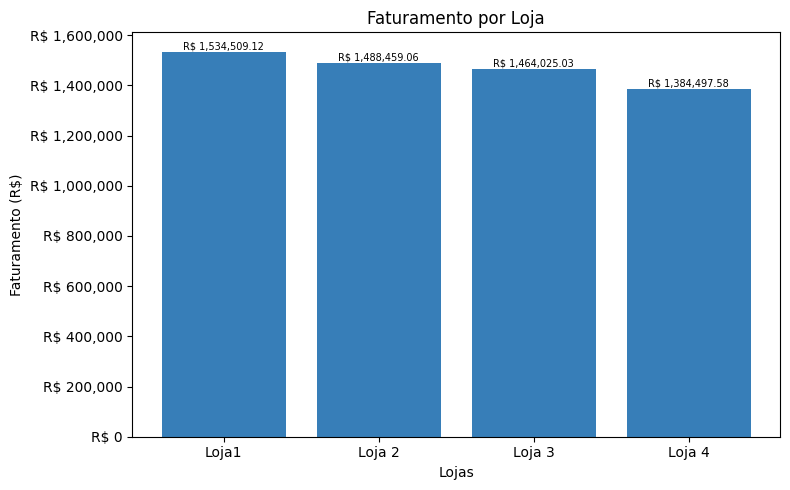

In [49]:
# Dados de faturamento por loja
lojas = ['Loja1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criando DataFrame de faturamento
df_faturamento = pd.DataFrame({'Loja': lojas, 'Faturamento': faturamento})

# Gráfico de faturamento por loja
plt.figure(figsize=(8, 5))
plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'], color='#377eb8')

# Título e rótulos
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')

# Formatação do eixo Y
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('R$ {x:,.0f}'))

# Mostrar valores em cima das barras
for i, valor in enumerate(df_faturamento['Faturamento']):
    plt.text(i, valor + 10000, f'R$ {valor:,.2f}', ha='center', fontsize=7)

# Ajusta o layout
plt.tight_layout()
plt.show()

2-Categoria Produto.

In [50]:
lojas = [loja1, loja2, loja3, loja4]
nomes = ['Loja1', 'Loja 2', 'Loja 3', 'Loja 4']

# Agrupando e contando registros por categoria com groupby() e .size()
tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]

# Une as tabelas, preenche com zeros e converte para inteiros
tabela_final = pd.concat(tabelas, axis=1).fillna(0).astype(int)
print(tabela_final)


                       Loja1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                
brinquedos               324     313     315     338
eletrodomesticos         312     305     278     254
eletronicos              448     422     451     451
esporte e lazer          284     275     277     277
instrumentos musicais    182     224     177     170
livros                   173     197     185     187
moveis                   465     442     499     480
utilidades domesticas    171     181     177     201


Vendas por Loja e Categoria

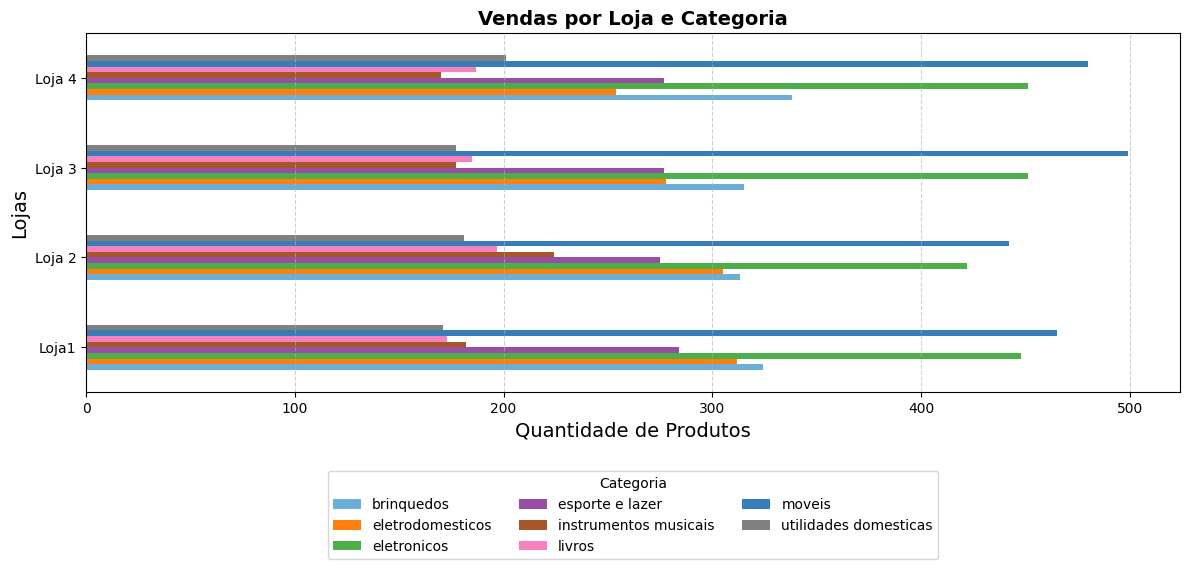

In [52]:
# Gráfico horizontal
tabela_plot = tabela_final.T

# Paleta de cores
cores = ['#6baed6', '#ff7f0e', '#4daf4a', '#984ea3', '#a65628', '#f781bf', '#377eb8', '#808080']

# Criando gráfico horizontal
tabela_plot.plot(kind='barh', figsize=(12, 6), color=cores[:tabela_plot.shape[1]])

# Títulos e rótulos
plt.title('Vendas por Loja e Categoria', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Produtos', fontsize=14)
plt.ylabel('Lojas', fontsize=14)

# Legenda posicionada abaixo para otimizar espaço
plt.legend(title='Categoria', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3, fontsize=10)

# Grades discretas para facilitar leitura
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


MÉDIA DE AVALIAÇÕES

In [53]:
# Criando uma lista de DataFrames e os nomes das lojas
lojas = [loja1, loja2, loja3, loja4]
nomes = ['Loja1', 'Loja 2', 'Loja 3', 'Loja 4']

# Calculando a média de avaliação da compra
medias_avaliacoes = {nome: l['Avaliação da compra'].mean() for l, nome in zip(lojas, nomes)}

# Convertendo o dicionário para DataFrame para visualização
tabela_medias = pd.DataFrame.from_dict(medias_avaliacoes, orient='index', columns=['Média de Avaliações'])

# Exibindo a tabela final
print(tabela_medias)

        Média de Avaliações
Loja1              3.976685
Loja 2             4.037304
Loja 3             4.048326
Loja 4             3.995759


CUSTO MÉDIO DE FRETE POR LOJA

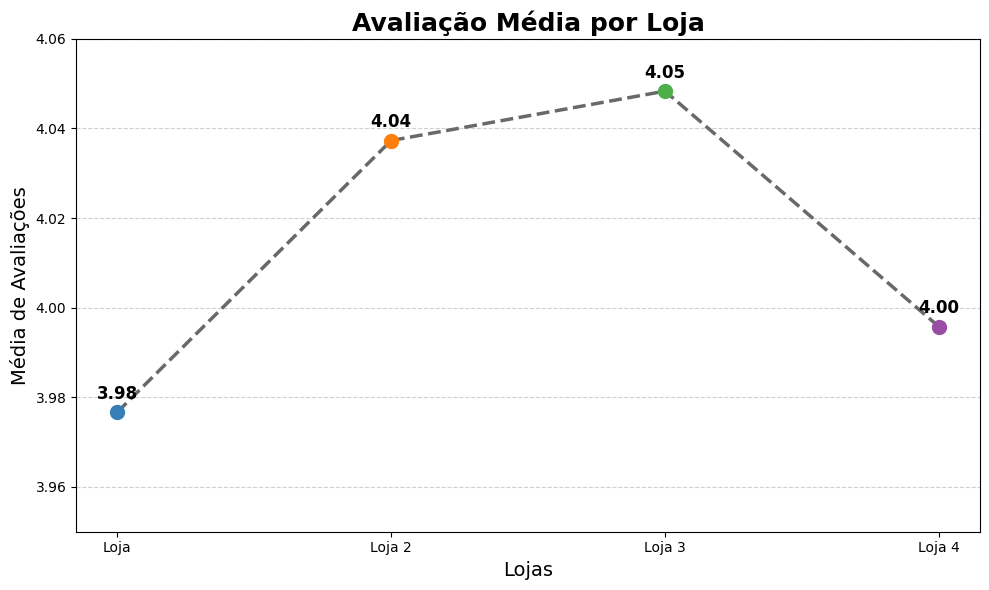

In [54]:
# Dados
lojas = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [3.976685, 4.037304, 4.048326, 3.995759]

# Cores para os pontos
cores = ['#377eb8', '#ff7f0e', '#4daf4a', '#984ea3']
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(lojas, medias, marker='o', linestyle='--', linewidth=2.5, color='dimgray')

# Adicionando os pontos com cores individuais
for i in range(len(lojas)):
    plt.scatter(lojas[i], medias[i], color=cores[i], s=100, zorder=3)
    plt.text(lojas[i], medias[i] + 0.003, f"{medias[i]:.2f}", ha='center', fontsize=12, fontweight='bold')

# Título e rótulos
plt.title('Avaliação Média por Loja', fontsize=18, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Média de Avaliações', fontsize=14)

# Limites para deixar visual mais agradável
plt.ylim(3.95, 4.06)

# Grid para facilitar leitura
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout ajustado
plt.tight_layout()

# Exibir
plt.show()

CATEGORIA POR PRODUTOS

In [56]:
lojas = [loja1, loja2, loja3, loja4]
nomes = ['Loja1', 'Loja 2', 'Loja 3', 'Loja 4']

# groupby().size() contar os produtos por categoria
tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]
tabela_final = pd.concat(tabelas, axis=1).fillna(0).astype(int)
print(tabela_final)

                       Loja1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                
brinquedos               324     313     315     338
eletrodomesticos         312     305     278     254
eletronicos              448     422     451     451
esporte e lazer          284     275     277     277
instrumentos musicais    182     224     177     170
livros                   173     197     185     187
moveis                   465     442     499     480
utilidades domesticas    171     181     177     201


PRODUTOS MAIS E MENOS VENDIDOS POR LOJA

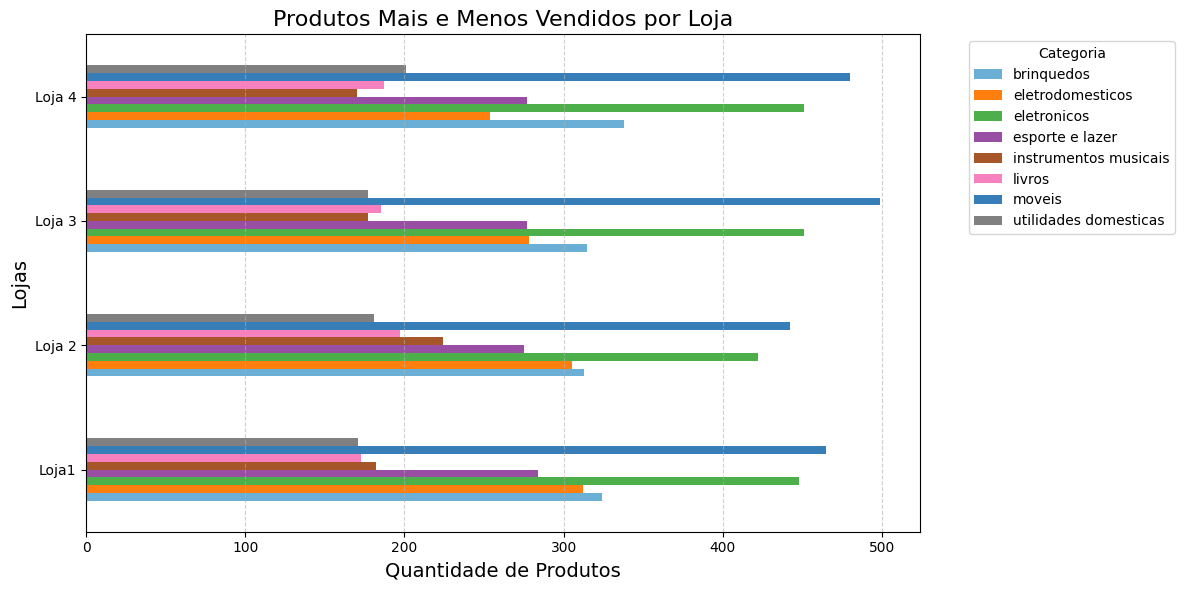

In [57]:
# Paleta de cores
cores = ['#6baed6', '#ff7f0e', '#4daf4a', '#984ea3', '#a65628', '#f781bf', '#377eb8', '#808080']

# Criando o gráfico horizontal
tabela_plot = tabela_final.T
tabela_plot.plot(kind='barh', figsize=(12, 6), color=cores[:len(tabela_plot.columns)])

# Títulos e rótulos
plt.title('Produtos Mais e Menos Vendidos por Loja', fontsize=16)
plt.xlabel('Quantidade de Produtos', fontsize=14)
plt.ylabel('Lojas', fontsize=14)

# Configurando a legenda
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grades para facilitar a leitura
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

PRODUTOS MAIS VENDIDOS POR LOJA

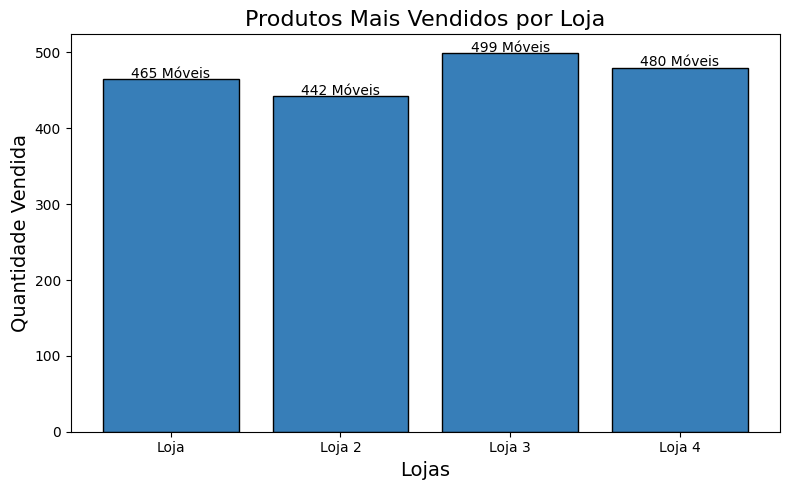

In [58]:
# Dados com os valores de produtos mais vendidos
dados_mais_vendidos = pd.DataFrame({
    'Produto': ['Móveis', 'Móveis', 'Móveis', 'Móveis'],  # Produto mais vendido
    'Quantidade': [465, 442, 499, 480]  # Quantidades
}, index=['Loja', 'Loja 2', 'Loja 3', 'Loja 4'])

# Gráfico com os rótulos detalhados
plt.figure(figsize=(8, 5))
plt.bar(dados_mais_vendidos.index, dados_mais_vendidos['Quantidade'], color='#377eb8', edgecolor='black')

# Rótulos com o produto e a quantidade
for i, (produto, quantidade) in enumerate(zip(dados_mais_vendidos['Produto'], dados_mais_vendidos['Quantidade'])):
    plt.text(i, quantidade + 2, f"{quantidade} {produto}", ha='center', fontsize=10)

# Título e rótulos
plt.title('Produtos Mais Vendidos por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

PRODUTOS MENOS VENDIDOS POR LOJA

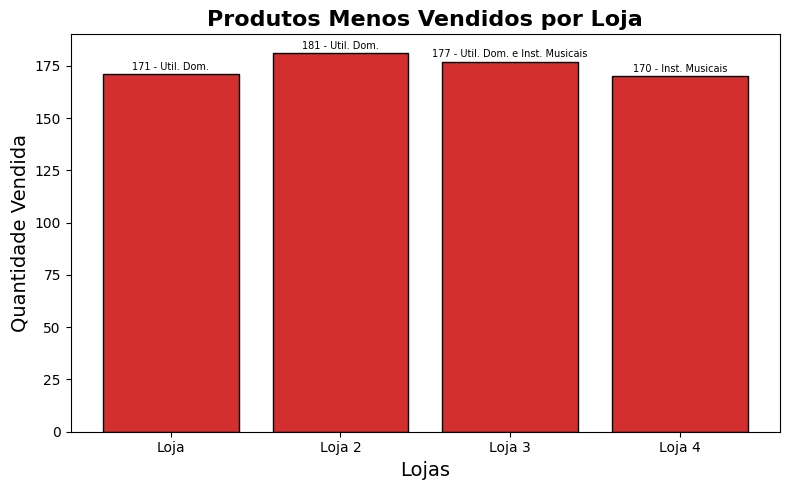

In [59]:
# Dados
dados_menos_vendidos = pd.DataFrame({
    'Produto': ['Util. Dom.', 'Util. Dom.',
                'Util. Dom. e Inst. Musicais',
                'Inst. Musicais'],  # Produtos menos vendidos
    'Quantidade': [171, 181, 177, 170]  # Quantidades
}, index=['Loja', 'Loja 2', 'Loja 3', 'Loja 4'])

# Criando o gráfico com vermelho mais elegante
plt.figure(figsize=(8, 5))
plt.bar(dados_menos_vendidos.index, dados_menos_vendidos['Quantidade'], color='#d32f2f', edgecolor='black')

# Adicionar rótulos detalhados e organizados
for i, (produto, quantidade) in enumerate(zip(dados_menos_vendidos['Produto'], dados_menos_vendidos['Quantidade'])):
    plt.text(i, quantidade + 2, f"{quantidade} - {produto}", ha='center', fontsize=7)

# Configurar título e rótulos
plt.title('Produtos Menos Vendidos por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Melhorar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

ANÁLISE DE FRETE POR LOJA

In [61]:
# Calcular o custo médio de frete por loja
def calcular_frete(df, nome_loja):
    frete_total = df['Frete'].sum()
    frete_medio = df['Frete'].mean()
    return frete_total, frete_medio

# Calcular o frete total e a média de cada loja
frete_loja1_total, frete_loja1_medio = calcular_frete(loja1, 'Loja')
frete_loja2_total, frete_loja2_medio = calcular_frete(loja2, 'Loja 2')
frete_loja3_total, frete_loja3_medio = calcular_frete(loja3, 'Loja 3')
frete_loja4_total, frete_loja4_medio = calcular_frete(loja4, 'Loja 4')

# Imprimir os resultados formatados
print(f"--- Análise de Frete por Loja ---")
print(f"Loja1: Frete Total = R$ {frete_loja1_total:,.2f}, Frete Médio = R$ {frete_loja1_medio:.2f}")
print(f"Loja 2: Frete Total = R$ {frete_loja2_total:,.2f}, Frete Médio = R$ {frete_loja2_medio:.2f}")
print(f"Loja 3: Frete Total = R$ {frete_loja3_total:,.2f}, Frete Médio = R$ {frete_loja3_medio:.2f}")
print(f"Loja 4: Frete Total = R$ {frete_loja4_total:,.2f}, Frete Médio = R$ {frete_loja4_medio:.2f}")

--- Análise de Frete por Loja ---
Loja1: Frete Total = R$ 81,837.97, Frete Médio = R$ 34.69
Loja 2: Frete Total = R$ 79,314.16, Frete Médio = R$ 33.62
Loja 3: Frete Total = R$ 78,022.66, Frete Médio = R$ 33.07
Loja 4: Frete Total = R$ 73,755.88, Frete Médio = R$ 31.28


FRETE TOTAL vs FRETE MÉDIO POR LOJA

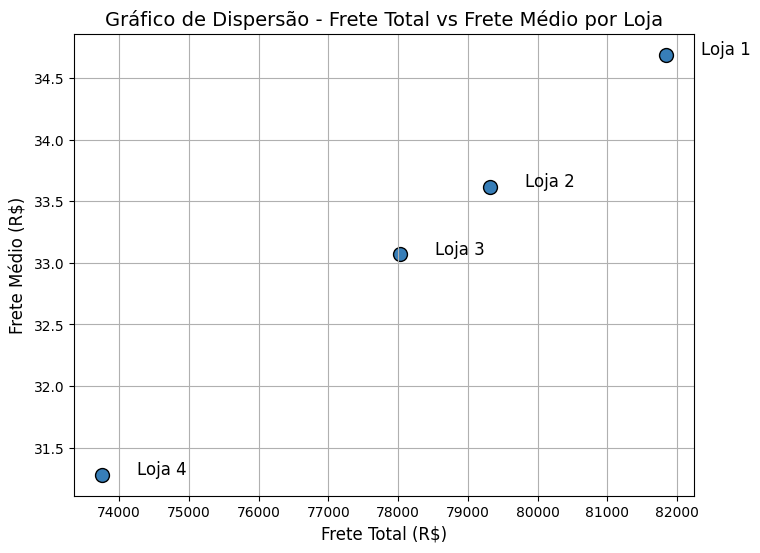

In [62]:
# Dados de frete total e frete médio por loja
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
frete_total = [81837.97, 79314.16, 78022.66, 73755.88]
frete_medio = [34.69, 33.62, 33.07, 31.28]

# Criando gráfico de dispersão
plt.figure(figsize=(8,6))
plt.scatter(frete_total, frete_medio, color='#377eb8', s=100, edgecolor='black')

# Adicionando os rótulos de cada ponto
for i, loja in enumerate(lojas):
    plt.text(frete_total[i] + 500, frete_medio[i], loja, fontsize=12)

# Definindo título e rótulos dos eixos
plt.title('Gráfico de Dispersão - Frete Total vs Frete Médio por Loja', fontsize=14)
plt.xlabel('Frete Total (R$)', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)

# Exibindo gráfico
plt.grid(True)
plt.show()

COORDENADAS DAS LOJAS COM NOMES

In [63]:
# Coordenadas das lojas com nomes
lojas = {
    'Loja 1': [(-23.55, -46.63), (-19.92, -43.94)],
    'Loja 2': [(-18.10, -44.38), (-22.25, -42.66), (-27.45, -50.95), (-30.17, -53.50), (-22.19, -48.79)],
    'Loja 3': [(-5.20, -39.53), (-30.17, -53.50), (-22.19, -48.79), (-13.29, -41.71), (-22.19, -48.79)],
    'Loja 4': [(-22.19, -48.79), (-15.98, -49.86), (-18.10, -44.38), (-18.10, -44.38), (-22.19, -48.79)]
}

# Cores definidas para cada loja
cores_lojas = {
    'Loja 1': 'red',
    'Loja 2': 'blue',
    'Loja 3': 'green',
    'Loja 4': 'orange'
}

# Criando o mapa centralizado no Brasil
mapa = folium.Map(location=[-22.19, -48.79], zoom_start=5)

# Adicionando marcadores com o número da loja
for nome_loja, coords in lojas.items():
    numero = nome_loja.split()[-1]  # Extrai apenas o número (1, 2, 3 e 4)
    cor = cores_lojas[nome_loja]
    for coord in coords:
        folium.Marker(
            location=coord,
            popup=nome_loja,
            icon=folium.DivIcon(html=f"""
                <div style="background-color:{cor};
                            color:white;
                            border-radius:50%;
                            width:24px;
                            height:24px;
                            text-align:center;
                            font-weight:bold;
                            line-height:24px;
                            border:2px solid white;">
                    {numero}
                </div>""")
        ).add_to(mapa)

mapa
